# VIDEO GAMES PROJECT

- Dataset from Kaggle.com
- This dataset contains a list of video games with sales greater than 100,000 copies
- All sales are in millions

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.style.use('ggplot')

In [4]:
import matplotlib.pyplot as plt



Importing dataset

In [5]:
df=pd.read_csv('vgsales.csv',engine='python')

#importing dataset



Dropping NaN values

In [6]:
df.dropna(how="any",inplace = True)
df.info()

#dropping NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
df.set_index('Rank', inplace = True)

#setting rank as index

In [8]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


Now let's do some data exploration

I want to see which genre has been the most popular by number of titles 

In [61]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Creating a column for count of titles per genre to plot a chart

In [62]:
df1=pd.DataFrame(df['Genre'].value_counts(ascending = True))
df1

,Genre
Puzzle,570
Strategy,670
Fighting,836
Simulation,848
Platform,875
Racing,1225
Adventure,1274
Shooter,1282
Role-Playing,1470
Misc,1686


In [11]:
df1.mean()

Genre    1357.583333
dtype: float64

In [12]:
df1.columns=['Count']

Text(0.5, 1.0, 'Number of Titles by Genre')

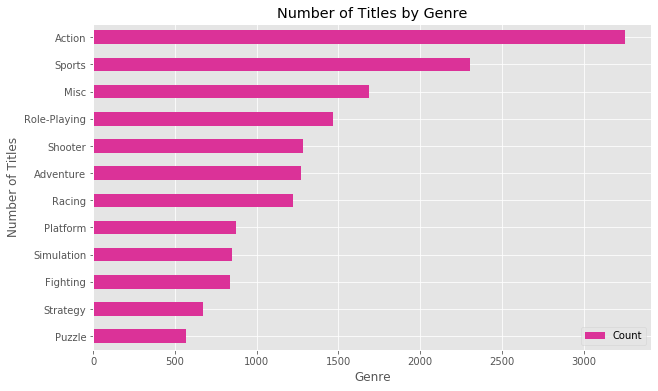

In [14]:
df1.plot(kind='barh', figsize = (10,6), color = '#db3298')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Genre')

- Action and action-related titles (sports, role-playing, shooter) produce the most # of titles
- Puzzle and strategy take the bottom positions
- This is consistent with expectations, since puzzle games tend to be more niche

Now let's look at Global Sales by Genre

In [15]:
df3 = df.loc[:,['Genre','Global_Sales']]

In [16]:
df4 = df3.groupby('Genre').sum()
df4.sort_values('Global_Sales', inplace = True)
df4

,Global_Sales
Genre,
Strategy,173.27
Adventure,234.59
Puzzle,242.21
Simulation,389.98
Fighting,444.05
Racing,726.76
Misc,789.87
Platform,829.13
Role-Playing,923.83


Text(0.5, 1.0, 'Global Sales by Genre')

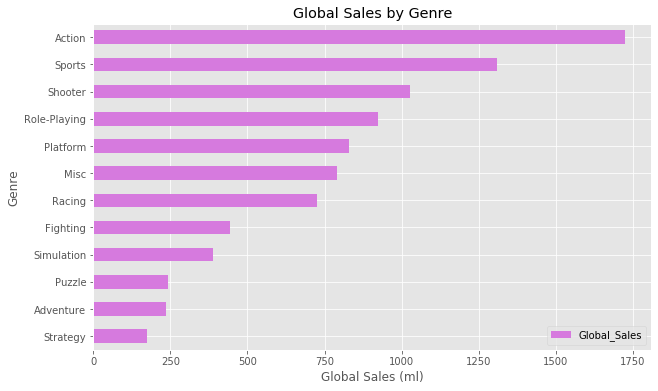

In [17]:
df4.plot(kind='barh', figsize = (10,6), color = '#d67ade')
plt.xlabel('Global Sales (ml)')
plt.ylabel('Genre')
plt.title('Global Sales by Genre')

- Action clings to 1st spot
- Adventure marks a hefty decline in ranking: many Adventure titles but few sales per title?


Now let's look at the average Global Sales per title 

In [18]:
per_title=df.loc[:,['Global_Sales', 'Genre']]
per_title.groupby('Genre').size()

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
dtype: int64

Text(0.5, 1.0, 'Sales per Title by Genre')

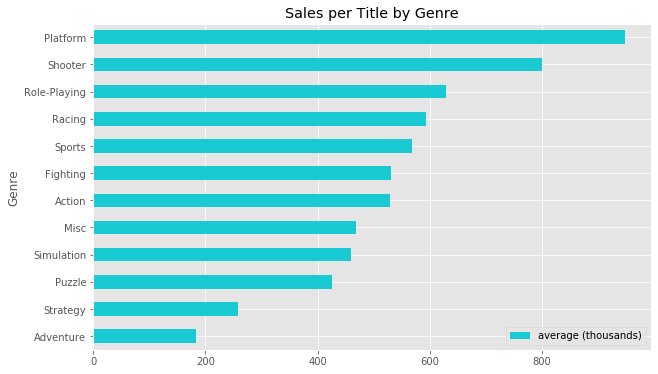

In [19]:
per_title1=per_title.groupby('Genre').sum()
per_title1['counts'] = per_title.groupby('Genre').size()
per_title1['average (thousands)'] = (per_title1['Global_Sales']/per_title1['counts'])*1000
per_title1.sort_values(by = 'average (thousands)', inplace = True)
per_title1.loc[:,['average (thousands)']].plot(kind='barh', figsize = (10,6), color = '#19cad2')
plt.title('Sales per Title by Genre')

- Platform games take top spot for sales per title
- Adventure reveals the lowest sales per title
- Not many platform games despite high returns per game - why?


In [64]:
platform=df.loc[:,['Name', 'Genre', 'Platform']]

df17=platform[platform['Genre']=='Platform']

df17['Platform'].value_counts()


GBA     139
PS2     101
DS       89
GC       73
PS       64
Wii      57
XB       49
PS3      36
PSP      36
N64      30
NES      28
3DS      28
SNES     26
X360     24
GB       18
WiiU     16
PS4      11
PC       11
PSV      10
2600      9
GEN       7
SAT       5
XOne      4
DC        2
GG        1
SCD       1
Name: Platform, dtype: int64

- Over 1/4 of all Platform games were made for 2 gaming platforms - GBA (GameBoyAdvanced) & PS2, but otherwise there is quite a spread, so this doesn't tell us much

In [48]:
df[df['Genre']=='Platform'].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
54,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79


- All top 10 platform games are from the Super Mario franchise
- Most likely this has skewed the Sales/Title figure for the Platform genre

"Not many platform games despite high returns per game - why?"
    - Few titles account for large number of sales 
    - Anomaly rather than general trend 


Now let's look at the top 10 games 

Text(0.5, 1.0, 'Top 10 Games by Sales')

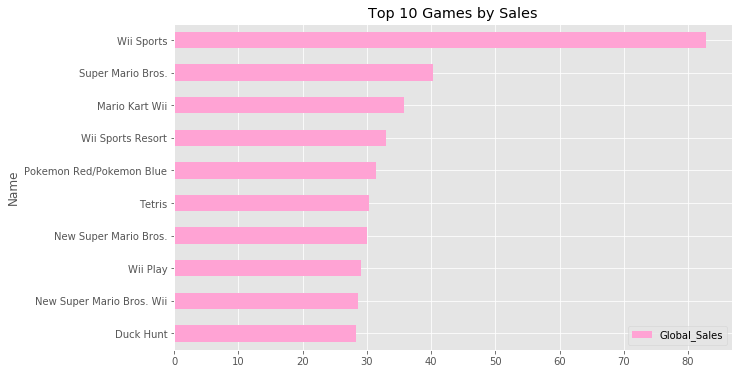

In [22]:
top_games=df.loc[:,['Name','Global_Sales']].head(10)
top_games.set_index('Name', inplace = True)
top_games = top_games.sort_values(by = 'Global_Sales', ascending = True)
top_games.plot(kind='barh', figsize = (10,6), color = '#ffa3d4')
plt.title('Top 10 Games by Sales')

Now that we've got a big picture overview, let's break this data down to look at the distribution of sales by territory

In [50]:
region_sales = df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

Text(0.5, 1.0, 'Sales by Region')

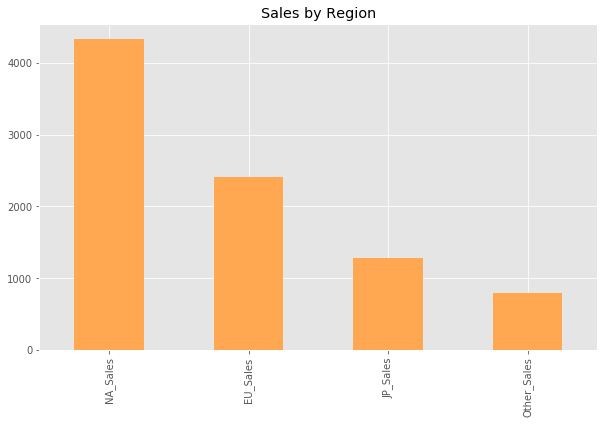

In [51]:
region_sales.plot(kind='bar', figsize = (10,6), color = '#ffa751')
plt.title('Sales by Region')


- North American market dominates, accounting for 49% of the Global Sales

Now let's look at sales by genre in each region

In [63]:
df6 = df.loc[:, ['Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [55]:
df7=df6[(df6['Genre']=='Action')|(df6['Genre']=='Sports')|(df6['Genre']=='Shooter')|(df6['Genre']=='Role-Playing')|(df6['Genre']=='Platform')|(df6['Genre']=='Misc')|(df6['Genre']=='Racing')|(df6['Genre']=='Fighting')|(df6['Genre']=='Simulation')|(df6['Genre']=='Puzzle')|(df6['Genre']=='Adventure')|(df6['Genre']=='Strategy')]

In [56]:
df8=df7.groupby('Genre').sum()

In [57]:
df8

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


Grouping titles by genre according to geographical distribution 

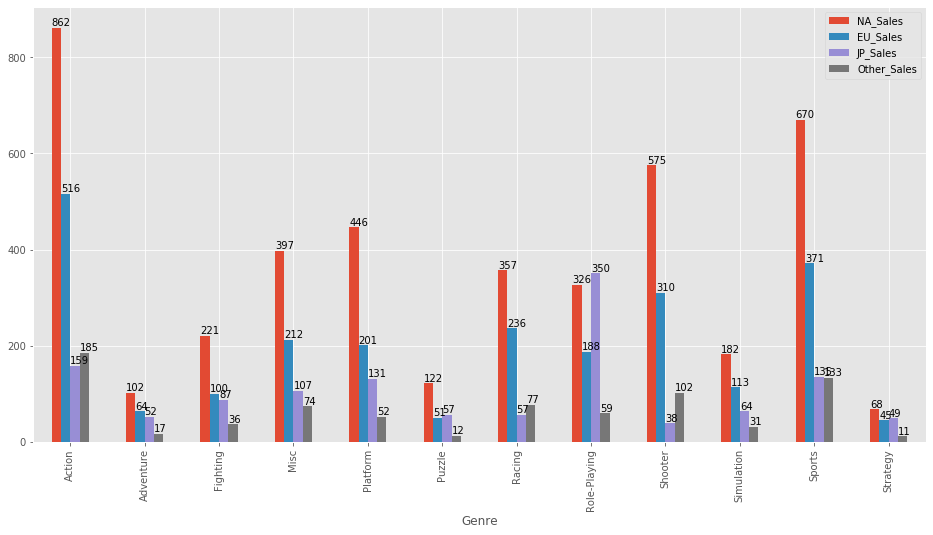

In [60]:
ax = df8.plot(kind='bar', figsize = (16,8))
for m in ax.patches:
    width, height = m.get_width(), m.get_height()
    x, y = m.get_xy()
    ax.annotate('{:.0f}'.format(height), (x, y + height + 4), fontsize = 10)

Through this we can see that North American market dominates every genre apart from Role-Playing, dominated by Japan


Lastly, let's look at sales by region over time 

In [52]:
df15=df.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [30]:
df15=df15.groupby('Year').sum()
df15.reset_index(inplace = True)

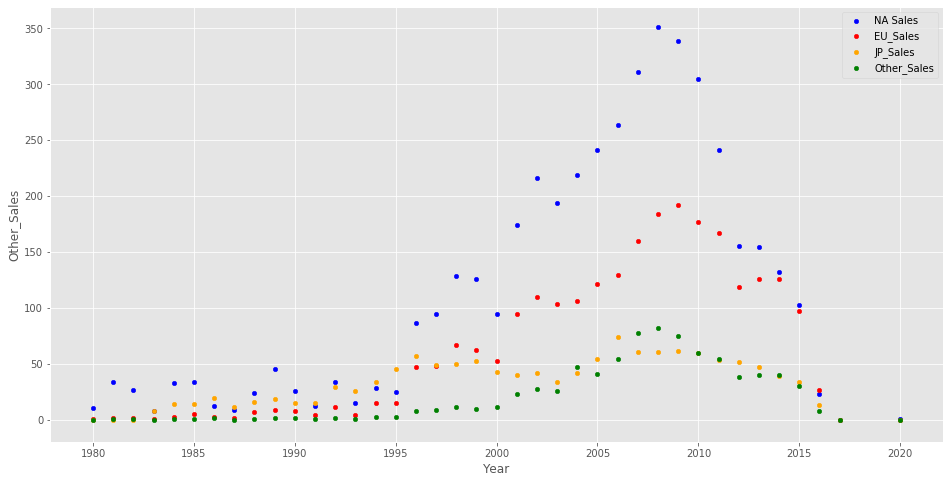

In [33]:
ax = df15.plot(kind="scatter", x="Year",y="NA_Sales", color="b", label="NA Sales", figsize =(16,8))

df15.plot(kind='scatter',x="Year",y="EU_Sales", color="r", label="EU_Sales", ax=ax)

df15.plot(kind='scatter',x="Year",y="JP_Sales", color="orange", label="JP_Sales", ax=ax)
df15.plot(kind='scatter',x="Year",y="Other_Sales", color="green", label="Other_Sales", ax=ax)

- NA market jumped ahead from 1995 onwards
- Global trend of growth 2000-2010, but considerable decline 2010-2020
- A peak in 2007-2008
- Point of interest for further analysis: causes of the sales decline post the peak of 2007-2008